# YOLO

* [You Only Look Once: Unified, Real-Time Object Detection (Redmon et. al., 2015)](https://arxiv.org/abs/1506.02640)
* [YOLO9000: Better, Faster, Stronger (Redmon et. al., 2015)](https://arxiv.org/abs/1612.08242)
* [YOLOv3: An Incremental Improvement (Redmon et. al., 2018)](https://arxiv.org/abs/1804.02767)
* [YOLOv4: Optimal Speed and Accuracy of Object Detection (Bochkovskiy et al., 2020)](https://arxiv.org/abs/2004.10934)
* [YOLOv5 (Glenn Jocher Ultralytics,  June 2020)](https://github.com/ultralytics/yolov5)
* [YOLOX: Exceeding YOLO Series in 2021 (Ge et al., June 2021)](https://arxiv.org/abs/2107.08430)

* [YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors(Chien-Yao Wang et. al. July 2022)](https://arxiv.org/abs/2207.02696)

*  [YOLOv6: A Single-Stage Object Detection Framework for Industrial Applications(Chuyi Li et. al., Sept 2022)](https://arxiv.org/abs/2209.02976)

*  	[YOLOv8,	Ultralytics, Dec. 2022](
https://github.com/ultralytics/ultralytics)
[(documentation !)](https://docs.ultralytics.com/)

* [YOLO6v3	YOLOv6 v3.0: A Full-Scale Reloading Chuyi Li et. al., Dec. 2023](https://arxiv.org/abs/2301.05586)

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov6_performance.png" width="1000"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2301.05586">YOLOv6 v3.0: A Full-Scale Reloading</a></em></center>

Первая версия YOLO вышла в том же году, что и SSD. На тот момент детектор несколько проигрывал SSD в точности.

Однако благодаря усилиям Joseph Redmon проект поддерживался и развивался в течение нескольких лет.

3-я версия детектора оказалась настолько удачной, что даже в 2021 можно было прочесть: ["YOLOv3, one of the most widely used detectors in industry"](https://arxiv.org/abs/2107.08430).

Последующие версии создавались разными авторами. Полагаем, что правильно считать их разными форками YOLOv3, а не новыми версиями, даже нумерация условна. Например, статья про YOLOv7 датируется более ранней датой, чем YOLOv6.

В прикладных задачах можно использовать YOLOv8, так как авторы выложили на свой сайт [документацию](https://docs.ultralytics.com/), а точность при скорости порядка 100 fps у всех современных моделей почти одинакова.

В настоящий момент можно сказать, что YOLO — это оптимальный детектор по соотношению качества распознавания к скорости.

Далее выборочно рассмотрим некоторые версии, чтобы разобраться, какие именно техники позволили так существенно улучшить качество и скорость детектирования.

## YOLOv3

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov3.png" width="1200"></center>

<center><em>Source: <a href="https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b#:~:text=YOLO%20v2%20used%20a%20custom,more%20layers%20for%20object%20detection.&text=First%2C%20YOLO%20v3%20uses%20a,layer%20network%20trained%20on%20Imagenet.">What’s new in YOLO v3?</a></em></center>


В качестве backbone используется оригинальная сверточная сеть DarkNet53, задействующая слои Batch Norm и Skip connection. Но есть реализации с ResNet в качестве backbone.

Детектор использует большинство техник, которые мы обсудили:

* Default boxes извлекаются на трех слоях различной глубины. Для каждой ячейки  предсказываются З окна.
* FPN: признаки конкатенируются, а не складываются.
* Resolution augmentation: при обучении разрешение входных изображений менялось от 384×384 до 672×672.
* В качестве loss function для классификации используется бинарная кросс-энтропия, позволяющая предсказывать несколько объектов в одном bounding box. Что позволяет использовать детектор с multilabel датасетами, где один объект может иметь несколько меток (person & woman).
* Предсказывается дополнительный параметр objectness score. Он не связан с классификацией. Его задача — предсказать, насколько вероятно, что в предсказанном default boх действительно есть объект и он будет учитываться при подсчете loss.

### Формат предсказаний

<img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov3_prediction.png" width="400">

<left><em>Source: <a href="https://blog.paperspace.com/how-to-implement-a-yolo-object-detector-in-pytorch/">How to implement a YOLO (v3) object detector from scratch in PyTorch</a></em></center>

Соответственно, для каждого anchor box предсказывается вот такой вектор значений:

* смещения;
* objectness — вероятность наличия объекта;
* scores — уверенность того, что bbox содержит объект определенного класса. Для моделей, обученных на СOCO, классов 80.

Для 80-ти классов получается 85 значений на один default box.

### <font color="orange"> Предсказание смещений</font>

Вот так преобразуются предсказания YOLOv3 для получения финальных координат bounding box

<img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov3_coordinates_prediction.png" width="500">

<left><p><em>Source: <a href="https://arxiv.org/pdf/1612.08242.pdf">YOLO9000:
Better, Faster, Stronger</a></p> </em></center>


$c_{x} , c_{y}$ — это координаты верхнего левого угла default box,

$p_{w} , p_{h}$ — это ширина и высота default box,

$t_{x} , t_{y}$ — предсказанные смещения  для центра,

$t_{w} , t_{h}$ — предсказанные корректировки  для ширины и высоты,

$b_{x} , b_{y}, b_{w}, b_{h}$ — координаты центра, ширина и высота финального предсказанного bouning box (значения в процентах от ширины и длины исходного изображения),

$\sigma(x) $ — сигмоида,

$e$ — число Эйлера.

Сторона каждой клетки равна $1$, так как это просто порядковый номер элемента в строке и столбце.

### <font color="orange">Почему не предсказывать абсолютные значения?</font>



Как видно по схеме, не предсказываются абсолютные значения смещений. Почему вместо того, чтобы в понятной регрессионной задаче предсказать 4 числа, предсказываются коэффициенты, с которыми затем происходят неочевидные преобразования?

Чтобы ответить на этот вопрос, вспомним про нормализацию данных. Мы нормализуем входные данные и центрируем их вокруг нуля.

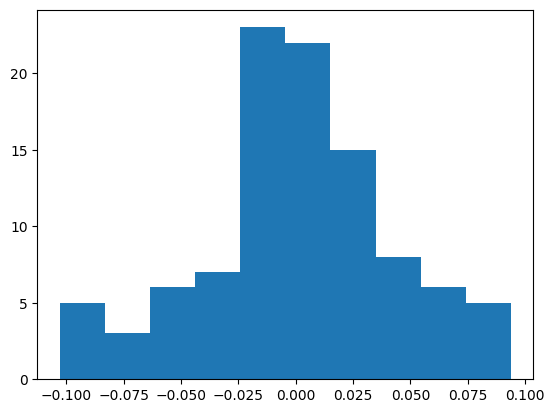

Mean: 0.00 Variance: 1.00


In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.randn((512, 100))  # Fake normalized data
plt.hist(x.mean(dim=0), bins=10)
plt.show()
print(f"Mean: {x.mean().item():.2f} Variance: {x.var().item():.2f}")

Кроме того, мы определенным образом инициализируем веса и добавляем слои нормализации, чтобы распределение входов очередного слоя (они же — выходы предыдущего) более-менее сохранялось.

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(100, 50),  # weights randomly sampled from some random distribution
    nn.ReLU(),
    nn.BatchNorm1d(50),
    nn.Linear(50, 1),
)

Веса инициализированы и равномерно распределены вокруг нуля:

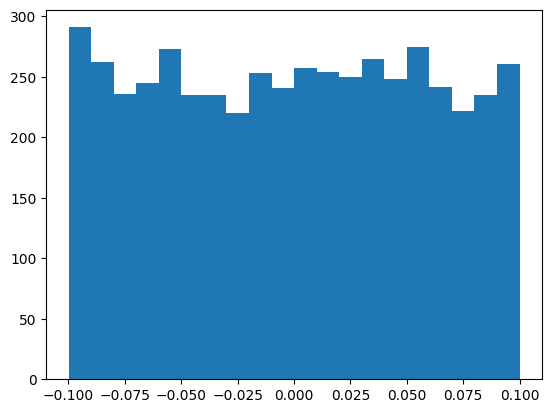

-0.0007625327


In [ ]:
weights = net[0].weight.data.numpy()
plt.hist(weights.flatten(), bins=20)
plt.show()
print(weights.mean())

И на выходе последнего слоя будет та же ситуация: необученная сеть будет чаще всего предсказывать околонулевые значения:

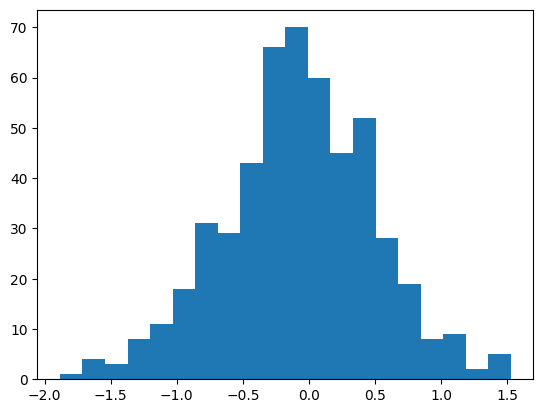

Mean: -0.08 Variance: 0.33


In [ ]:
out = net(x)
plt.hist(out.detach().numpy(), bins=20)
plt.show()
print(f"Mean: {out.mean().item():.2f} Variance: {out.var().item():.2f}")

Если мы будем пытаться предсказывать большие по модулю значения, например, абсолютные координаты:

In [ ]:
targets = torch.randint(0, 224, (512, 1))  # fake coordinate in range [0 .. 255]
print(targets[:10].flatten())

tensor([ 59, 204, 168,  98, 163, 142,  97, 182, 141, 186])


То получим огромную ошибку, которая повлечет большое обновление весов и приведет к нестабильному обучению, большим абсолютным значениям весов и т.п.

In [ ]:
criterion = nn.MSELoss()
loss = criterion(out, targets)
print("Loss", loss.item())

Loss 17191.26171875


Если мы стандартизуем координаты (targets):

In [ ]:
mean = targets.float().mean()
std = targets.float().std()

transformed_targets = (targets - mean) / std

print(transformed_targets.flatten()[:10])

tensor([-0.8725,  1.4046,  0.8393, -0.2600,  0.7608,  0.4310, -0.2757,  1.0591,
         0.4153,  1.1219])


То получим ошибку на 4 порядка меньше:

In [ ]:
loss = criterion(out, transformed_targets)
print("Loss", loss.item())

Loss 1.3540452718734741


Фактически теперь мы предсказываем смещение от среднего значения. Чтобы его затем использовать, надо его денормализовать:

In [ ]:
real_out = out * std + mean
print(real_out.int().flatten()[:10])  # values like a coords

tensor([ 74,  63,  30,  50,  91,  84,  95,  85, 134,  88], dtype=torch.int32)


Иногда такую постобработку удобно включить в модель, чтобы она учитывалась при подсчете loss.

**Центр**

В случае, когда смещение не нужно, сеть предсказывает нулевые значения для $t_{x}$ и $t_{y}$:

$\sigma(0) = 0.5$





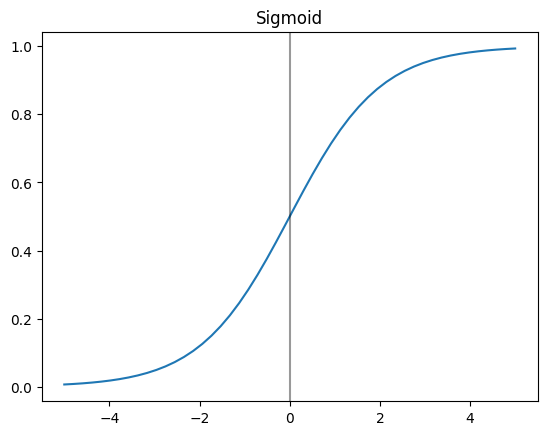

In [ ]:
# plot sigmoid function
import numpy as np

x = np.linspace(-5, 5)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.axvline(0, color="black", alpha=0.4)
plt.title("Sigmoid")
plt.show()

Соответственно, центр предсказанного bbox окажется в центре клетки и совпадет с центром default box.

Если смещение t большОе положительное, тo $\sigma(t)$ будет близко к $+1$ и центр сместится к правой границе ячейки, однако никода не выйдет за ее пределы, так как $\sigma(t) < 1$.

Аналогично для отрицательных значений.

Это ровно то, что нам нужно, так как за предсказания bbox объектов, центры которых лежат в других ячейках, должны отвечать default box соответствующих ячеек.



**Ширина и высота**

Корректировку для ширины и высоты нет смысла ограничивать единицей, так как объект может занимать несколько ячеек и даже выходить за границу изображения.

Здесь ширина и высота  default box ($p_{w} , p_{h}$) масштабируются путем умножения на $e^t$.

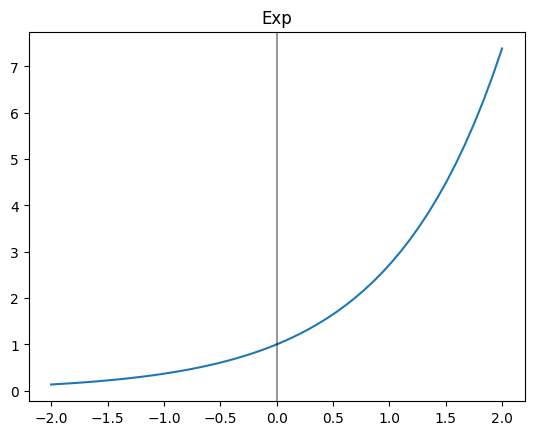

In [ ]:
# Plot exponent
x = np.linspace(-2, 2)
y = np.exp(x)
plt.plot(x, y)
plt.axvline(0, color="black", alpha=0.4)
plt.title("Exp")
plt.show()

При $t~= 0$, когда сеть не обучена или корректировка не нужна, $e^0 ~=1$ и $b =p*e^t ~= p$.

При заметном отклонении $t$ от нуля ширина с высотой будут либо стремительно расти (при $t>>0$), либо стремительно уменьшаться ($t<<0$).

Этот прием часто используется для предсказания сетью значений, имеющих большой разброс.

## YOLOv4

YOLOv3 на момент выхода стал одним из самых быстрых детекторов и последней версией за авторством Джозефа Редмона.

YOLOv4 — это детище других авторов. Модель не стала быстрее, но стала намного более точной.

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov4.jpeg" width="700"></center>

<center><em>Source: <a href="https://medium.com/visionwizard/yolov4-version-3-proposed-workflow-e4fa175b902"> YOLOv4 — Version 3: Proposed Workflow</a></em></center>

Что же добавили авторы?

1. Поменялся Backbone:
 * увеличилось количество слоев,
 * добавился SPP block,
 * добавились Dense блоки (дополнительные skip connection как в [DenseNet](https://arxiv.org/abs/1608.06993)),
 * появились PAN блоки (Path Aggregation Network Module).




### Path Aggregation Network Module(PAN)



<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/pan.png" width="600"></center>

<center><em>Source: <a href="https://openaccess.thecvf.com/content_cvpr_2018/papers/Liu_Path_Aggregation_Network_CVPR_2018_paper.pdf">Path Aggregation Network for Instance Segmentation</a></em></center>

а) Строится пирамида признаков, при этом некоторые карты признаков дополняются  признакими с более ранних слоев (красный пунктир).

b) Затем на основе последнего слоя FPN строится еще одна (Bottom-up), и опять новые карты признаков дополняются признакими, полученными на первом уровне (зеленый пунктир).

2. *Поменялся [процесс обучения](https://blog.roboflow.com/yolov4-data-augmentation/)*. В частности, использовались такие техники аугментации, как:


### Mosaic augmentation

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/mosaic_augmentation.jpg" width="900"></center>

<center><em>Source: <a href="https://medium.com/visionwizard/yolov4-version-3-proposed-workflow-e4fa175b902"> YOLOv4 — Version 3: Proposed Workflow </a></em></center>

Изображение, которое подается на вход сети, склеивается из нескольких (4) фрагментов разных изображений. При этом статистика для Batch norm считается по 4-м полным изображениям.
Такая стратегия позволяет уменьшить размер batch, что важно при работе с изображениями, имеющими большое разрешение.

### Self-Adversarial Training (SAT)

Это [Adversarial attack](https://en.wikipedia.org/wiki/Adversarial_machine_learning) непосредственно в процессе обучения. Для каждого batch выполняется 2 forward и 2 backward прохода:
*  Выполняется прямой проход и подсчитывается loss.
*  После первого прохода обновляются изображения, а не веса сети.
*  Далее сеть учится на измененных изображениях.





## YOLOv5


<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov5.png" width="900"></center>


Статья не публиковалась.
Точность сравнима  с YOLOv4, но модель определенно хорошо упакована и доступна на [`torch.hub`](https://pytorch.org/hub/ultralytics_yolov5/).



<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolo5_ver.png" width="700"></center>

В репозитории содержится несколько предобученных моделей. Чем больше параметров у модели, тем она точнее и одновременно медленнее.


## <font color="orange">YOLOX</font>


<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolox_speed.png" width="500"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/2107.08430.pdf"> YOLOX: Exceeding YOLO Series in 2021</a></em></center>


Авторы использовали в качестве baseline модели YOLOv3 и, убедившись на ней в эффективности усовершенствований, применили некоторые из них к YOLOv4 и YOLOv5.

Далее рассмотрим список нововведений.

### Decoupled head

<img src ="https://ml.gan4x4.ru/msu/additions/L11/yolox_decoupled_head.png" width="700">

<center><em>Source: <a href="https://arxiv.org/pdf/2107.08430.pdf">YOLOX: Exceeding YOLO Series in 2021</a></em></center>

Так же, как в RetinaNet, для регрессии и классификации используются различные головы (подсети).

### Anchor-free

Все детекторы, которые рассматривались ранее, использовали несколько предопределенных default box (anchor) для каждой точки на карте признаков.
Количество и размер этих якорных окон являются гиперпараметрами модели.

В 2019 г вышла статья [FCOS: Fully Convolutional One-Stage](https://towardsdatascience.com/forget-the-hassles-of-anchor-boxes-with-fcos-fully-convolutional-one-stage-object-detection-fc0e25622e1c), где авторы отказываются от такого подхода. Для каждой точки на карте признаков сразу предсказывают один bounding box.

Если пиксель, соответствующий центру предсказанного bounding box, попадает в истинный (ground true) bounding box, то он используется при подсчете loss.

Это подход был применен и в YOLOX.

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolox_techniques.png" width="1000"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/2107.08430.pdf">YOLOX: Exceeding YOLO Series in 2021
</a></em></center>




* Advanced label assigning strategy (SimOTA)
* MultiPositives
* OTA/SimOTA

## YOLOv6

Судя по результатам, опубликованным в статье, эта модель самая точная из семейства YOLO на начало 2023г.

В статье описаны следующие модификации архитектуры и техники обучения:

### Усовершенствована PAN подсеть ("шея"):

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov6_neck.png" width="1000"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2301.05586">YOLOv6 v3.0: A Full-Scale Reloading
</a></em></center>




### Anchor-Aided Training

<center><img src ="https://ml.gan4x4.ru/msu/additions/L11/yolov6_head.png" width="600"></center>

<center><em>Source: <a href="https://arxiv.org/abs/2301.05586">YOLOv6 v3.0: A Full-Scale Reloading
</a></em></center>

В режиме вывода детектор работает в anchor-free режиме. То есть предсказывает только один boundong box на элемент карты признаков.

Но при обучении использовался дополнительный (auxilliary) anchor-based блок, выходы которого учитывались при подсчете loss. В режиме вывода он не задействуется и, соответственно, не оказывает влияние на скорость.

### Self-distillation

При обучении легких моделей использовались тяжелые.

При дистилляции к loss, полученному при помощи разметки ($L_{det}$), добавляется 2-й компонент, который сравнивает выходы большой (teacher) и малой (student) моделей.

$ L = L_{det} + \alpha L_{KD}$

Сравнение выходов (распределений) можно провести при помощи KL дивергенции.

$L_{KD} = KL(p_t^{cls} || p_s^{cls} ) + KL(p_t^{reg}||p_s^{reg})$

$p_t^{cls}$ — предсказания вероятностей классов учителем,

$p_s^{cls}$ — предсказания вероятностей классов обучаемой моделью (student),

$p_t^{reg}$ — предсказания смещений учителем,

$p_s^{reg}$ — предсказания смещений обучаемой моделью,


Подробнее про такой подход можно прочесть в статье:

[Generalized Focal Loss: Learning Qualified and Distributed Bounding Boxes for Dense Object Detection](https://paperswithcode.com/paper/generalized-focal-loss-learning-qualified-and)


В случае с YOLOv6v3 при дистиляции для второй компоненты loss ($L_{KL}$) использовася дополнительный выход, который не задействуется в режиме вывода.

К сожалению, [документация к API](https://yolov6-docs.readthedocs.io/zh_CN/latest/) модели выложена только на китайском языке.

## YOLOv8

По этой модели не публиковалась статья, зато есть [документация](https://docs.ultralytics.com/quickstart/).

Попробуем попробуем запустить ее.

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 8.2 MB/s eta 0:00:00


Инстанцируем модель по названию. Полный [список предобученных моделей](https://github.com/ultralytics/ultralytics#models).

In [ ]:
from ultralytics import YOLO

yolo8 = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 58.1MB/s]


Скачаем тестовое изображение

In [ ]:
!wget -q https://ml.gan4x4.ru/msu/additions/L11/gentelmens.jpg

Загрузим и детектируем на нем объекты.

Из коробки работает с изображениями в разных форматах (даже url), автоматически меняет размер входного изображения, возвращает объект с результатами и др.

In [ ]:
from PIL import Image

# pil_img = Image.open("gentelmens.jpg")
results = yolo8("gentelmens.jpg")


image 1/1 /content/gentelmens.jpg: 448x640 1 person, 1 tie, 2 vases, 182.3ms
Speed: 12.0ms preprocess, 182.3ms inference, 6.6ms postprocess per image at shape (1, 3, 448, 640)


В качестве результата возвращается список объектов, которые содержат полную информацию о детектировании.



In [ ]:
print(len(results))  # contains detections for one image

1


У него есть методы для получения списка координат предсказанных bounding box после NMS:

In [ ]:
# https://docs.ultralytics.com/reference/results/
print(results[0].boxes.data)  # x1,y2,x2,y2,conf,class_num

tensor([[3.4140e+02, 5.5955e+01, 4.7475e+02, 4.7659e+02, 8.1170e-01, 0.0000e+00],
        [1.4253e+02, 3.2609e+02, 2.1434e+02, 4.0494e+02, 4.8517e-01, 7.5000e+01],
        [3.7530e+02, 1.6003e+02, 3.9831e+02, 2.6073e+02, 3.1243e-01, 2.7000e+01],
        [2.1163e+02, 3.2809e+02, 2.7738e+02, 4.0254e+02, 2.7357e-01, 7.5000e+01]])


Может даже создать картинку с нарисоваными bounding box:

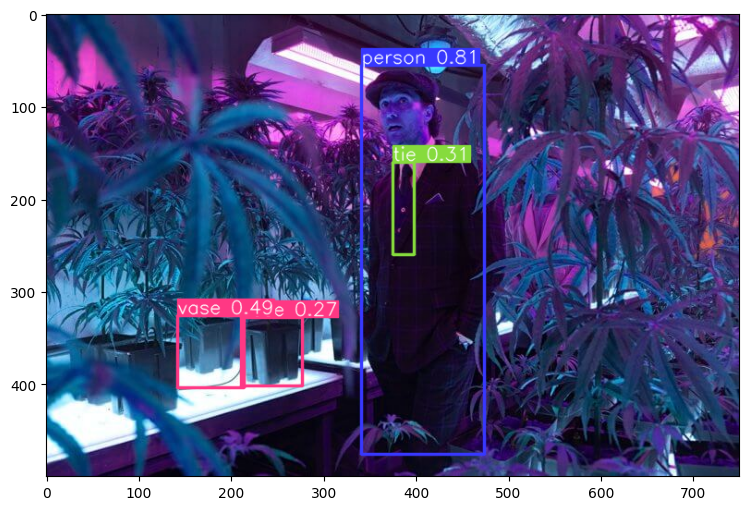

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pil_with_bbox = results[0].plot()
plt.imshow(pil_with_bbox)  # BGR?
plt.show()

Похоже, объект results хранит картинку в BGR формате. Переведем в RGB:

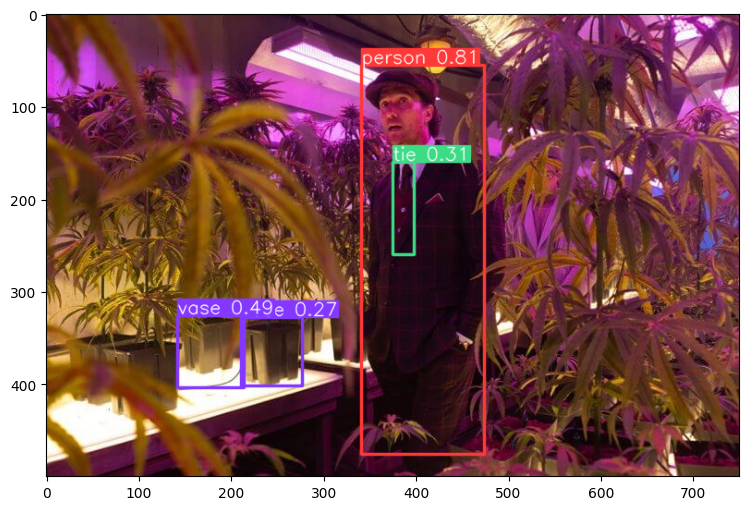

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(pil_with_bbox[..., ::-1])  # BGR->RGB
plt.show()